# Devoir Equations Différentielles 



## **Introduction** :
Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de la manière suivante:

\begin{align*}
\dot{x}_1 &= x_1 (\alpha - \beta x_2) \\
\dot{x}_2 &= -x_2 (\gamma - \delta x_1) \\
\end{align*}

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

### Introduction des variables et des fonctions utiles au projet :
Commençons par importer les modules Python qui serviront par la suite.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp

Puis créons les variables et les fonctions de l'énoncé.

In [2]:
alpha = 0.5
beta = 0.5
gamma = 0.5
delta = 0.5

def LV(t, x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1*(alpha - beta*x2), -x2*(gamma - delta*x1)])

def H(x1,x2):
    return(delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2))

## **Question 1 :** 
Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\bar{x} \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Que peut-on dire de leur stabilité à ce stade ?

### Réponse 1 :

L'équation différentielle s'écrit :

$$
\left(\begin{array}{cc} 
\dot{x_1}(t)\\
\dot{x_2}(t)
\end{array}\right)
= f(t,x)
$$
avec
$$
f(t,x)=
\left(\begin{array}{cc} 
x_1(\alpha - \beta x_2)\\
-x_2(\gamma - \delta x_1)
\end{array}\right)
, \ 
x = 
\left(\begin{array}{cc} 
x_1\\
x_2
\end{array}\right)
$$


Les termes présents dans cette équation différentielle sont des réels de $]0,1]$ qui représentent un taux (pourcentage) : 

- $\alpha$ : taux de reproduction des proies
- $\beta$ : taux de prédation (plus ce taux est élevé, plus les prédateurs sont aptes à capturer des proies)
- $\gamma$ : taux de mortalité des prédateurs
- $\delta$ : taux de nutrition des proies (plus ce taux est élevé, plus les prédateurs sont aptes à survivre en mangeant une proie)

Les points d'équilibre vérifient :
$\dot{x_1}$ $=$ $\dot{x_2}$ $= 0$ 

$x_1(\alpha - \beta x_2) = 0 \\
x_2(\gamma - \delta x_1) = 0$

$x_1 = x_2 = 0 \ \ \ 
ou \ \ \ 
x_1 = \frac{\gamma}{\delta} \ et \ x_2 = \frac{\alpha}{\beta}$ 

Les points d'équilibre sont donc $(0,0)$ et $\bar{x}$=$(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$.

Si on calcule le Jacobien de f en ces points on a : 
$$
J_f(x) =
\left(\begin{array}{cc} 
\alpha - \beta x_2 & -\beta x_1\\
\delta x_2 & -\gamma + \delta x_1
\end{array}\right)
$$ 
Ce qui donne :
$$
J_f(0) =
\left(\begin{array}{cc} 
\alpha & 0\\
\ 0 & -\gamma
\end{array}\right)
$$

$$
J_f(\bar{x}) =
\left(\begin{array}{cc} 
\ 0 & -\frac{\beta \gamma}{\delta} \\
\ \frac{\delta \alpha}{\beta} & 0
\end{array}\right)
$$

La matrice jacobienne en 0 a pour valeurs propres $\alpha > 0$ et $-\gamma < 0$, donc 0 n'est pas stable.

La matrice jacobienne en $\bar{x}$ est semblable à la matrice diagonale :


$$
\left(\begin{array}{cc} 
i \sqrt{\alpha \gamma} & 0\\
\ 0 & -i \sqrt{\alpha \gamma}
\end{array}\right)
$$


dont les valeurs propres sont imaginaires pures, donc on ne peut pas conclure quant à la stabilité de $\bar{x}$.

## **Question 2 :**
A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

### Réponse 2 :
On remarque que les solutions orbitent autour du point d'équilibre $\bar x$, on peut donc intuiter que les solutions sont périodiques.

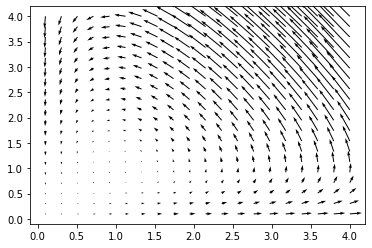

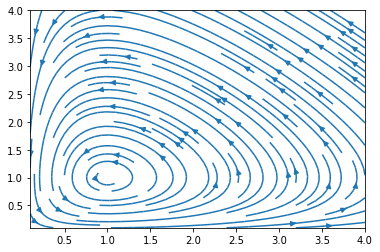

In [3]:
x1 = np.linspace(0.1, 4, 20)
x2 = np.linspace(0.1, 4, 20)

X = np.meshgrid(x1, x2)

U, V = LV(0, X)

plt.quiver(X[0], X[1], U, V, scale=50)
plt.show()

plt.streamplot(X[0], X[1], U, V)
plt.show()

## **Question 3 :**
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ reste dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ sur son ensemble de définition.

### Réponse 3 :
$f$ est polynomiale donc elle est $C^\infty$ sur $\mathbb{R} \times \mathbb{R^2}$. On peut donc appliquer le théorème de Cauchy-Lipschitz. 
Soit $(t_0,x_0) \in \mathbb{R} \times (\mathbb{R^*_+})^2$, considérons l'unique solution $x(t)$ du problème de Cauchy de conditions initiales $(t_0,x_0)$. Supposons par l'absurde qu'il existe $t_1 > t_0$ tel que $x(t_1) \notin \mathbb{R^*_+}^2$. Distinguons les cas :
- Si $x_1(t_1) \leqslant 0 , \exists t_2 \in [t_0,t_1]$ tel que $x_1(t_2) = 0$ \
La fonction 
$\tilde{x}(t) = (0, x_2(t_2)e^{-\gamma (t-t_2)})$ est l'unique solution du problème de Cauchy de condition initiale $(t_2,x(t_2))$. Comme $x$ est solution du même problème de Cauchy, on a $\tilde{x} = x$ ce qui est absurde car $x(t_0) \not = \tilde{x}(t_0)$.

- De même, si $x_2(t_1) \leqslant 0 , \exists t_2 \in [t_0,t_1]$ tel que $x_2(t_2) = 0$ \
La fonction 
$\tilde{x}(t) = (x_2(t_2)e^{\alpha (t-t_2)}, 0)$ est l'unique solution du problème de Cauchy de condition initiale $(t_2,x(t_2))$. Comme $x$ est solution du même problème de Cauchy, on a $\tilde{x} = x$ ce qui est absurde car $x(t_0) \not = \tilde{x}(t_0)$.

On en déduit donc que si $(t_0,x_0) \in \mathbb{R} \times \mathbb{R^*_+}^2$, alors $\forall t \in I$, $x(t) \in \mathbb{R^*_+}^2$ avec $x : I \mapsto \mathbb{R^2}$ solution maximale du problème de Cauchy de condition initiale $(t_0,x_0)$.

## **Question 4 :**
On considère la fonction $$H(x_1, x_2) = \delta x_1 − \gamma \ln{x_1} + \beta x_2 − \alpha \ln{x_2}$$ 
définie sur $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ est définie sur $\mathbb{R}$.

### Réponse 4 :

$$
\left .\begin{array}{cll} 
\partial_1H(x_1,x_2) & = & \delta - \frac{\gamma}{x_1}
\\
\partial_2H(x_1,x_2) & = & \beta - \frac{\alpha}{x_2}
\\
\end{array}\right.
$$

Donc 

$$
\left .\begin{array}{cll}
\nabla{H(x)} & = & \left(\begin{array}{cc} 
\delta - \frac{\gamma}{x_1}\\
\beta - \frac{\alpha}{x_2}
\end{array}\right)
\\
\\
\\
\ & = & \frac{1}{x_1,x_2}\left(\begin{array}{cc} 
-x_2(\gamma - \delta x_1)\\
-x_1(\alpha - \beta x_2)
\end{array}\right)
\end{array}\right.
$$
On en déduit donc que pour des solutions initialisées dans $(\mathbb{R}^*_+)^2$ :
$$
\left .\begin{array}{cll} 
\frac{d}{dt}H(x(t)) & = & \langle \nabla H(x(t)),f(x(t)) \rangle & = & 0\\
\\
\end{array}\right.
$$
D'où : $\exists c \in \mathbb{R}$ tel que $\forall t \in I, H(x(t))=c$.  
Considérons la courbe de niveau c : 
$E = \{(x_1,x_2)\in (\mathbb{R}^*_+)^2 | H(x_1,x_2)=c\}$
Si $x(t_0) \in (\mathbb{R}^*_+)^2$ alors les solutions restent dans $E$.
$H$ est continue et $E = H^{-1}(\{c\})$ avec $\{c\}$ fermé. Ainsi, $E$ est fermé.

Comme $H(x) \to +\infty$ quand $||x|| \to +\infty$, alors il existe $A>0$ tel que $\forall x \in \mathbb{R}^2$, $||x|| \geq A \Rightarrow H(x) > c$.
Donc par contraposée : 
$x \in E \Rightarrow ||x|| < A$, d'où $E$ est borné.

$E$ étant fermé et borné, on en déduit que $E$ est compact.

$f$ est continue sur $\mathbb{R}^2$ donc d'après le théorème maximal d'existence, si la solution maximale n'était pas définie sur $\mathbb{R}$, elle exploserait en temps fini, ce qui est impossible ici. 

On en conclut donc que toute solution initialisée dans $(\mathbb{R}^*_+)^2$ est définie sur $\mathbb{R}$.

## Question 5 :
Représenter les courbes de niveau de $H$. Où se trouve $\bar{x}$ ? Qu’en conclue-t-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.

### Réponse 5 :

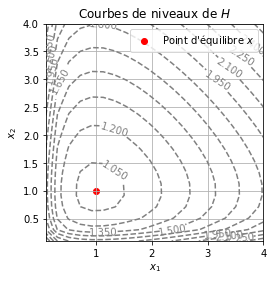

In [4]:
#on définit une fonction qui permet de visualiser la courbes de niveaux, qu'on appelera par la suite.
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(X, Y, Z, colors="grey", linestyles="dashed", levels=levels)
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

display_contour(H, x1, x2, 15)
plt.title("Courbes de niveaux de $H$")

x_eq = [gamma/delta, alpha/beta]
plt.scatter(x_eq[0], x_eq[1], c='r', label="Point d'équilibre $x$")
plt.legend();

On constate que les lignes de niveaux de $H$ sont identiques aux lignes du portrait de phase pour les solutions des équations de Lotka-Volterra. On en déduit que les solutions de ces équations parcourent une même ligne de niveau de $H$ au cours du temps. 

De plus, $\bar x$ se trouve au centre des lignes de niveaux de $H$. Cela signie que si une solution est initialisée très proche de $\bar x$, elle en restera très proche car parcourant une ligne de niveau très proche de $\bar x$. Ainsi, $\bar x$ est stable, au sens de la définition de la stabilité.

## Question 6 : 
Coder une fonction du type


$\text{def  solve_euler_explicit }(f, x_0, dt, t_0, t_f): \\
...\\
\text{return  } t, x$


prenant en entrée une fonction $ f : \mathbb{R}\times\mathbb{R}^n \longrightarrow \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d’Euler explicite appliqué à $\dot{x} = f(t, x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

### Réponse 6 :

In [5]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    #on créé un tableau de 0, dont on modifiera les valeurs au fur et à mesure, en itérant.
        #la première dimension dépend du pas de temps, car elle doit contenir autant d'éléments que la liste des temps
        #la deuxième dimension dépend de l'espace de départ de la fonction qui régit l'équation différentielle. 
            #On se refère donc à la taille du vecteur x0, qui est donnée par np.shape(x0)[0].
    x = np.zeros(shape=(round((tf-t0)/dt) + 1, np.shape(x0)[0])) 
    #on initiliase la solution :
    x[0] = x0  
    t = [t0]
    for i in range(round((tf-t0)/dt)): 
        t_new = t[i] + dt
        x_new = x[i] + dt*f(t[i], x[i])
        x[i+1] = x_new
        t.append(t_new)
    return t, x

On peut tester l'algorithme d'Euler pour l'équation $\dot x(t) + x(t) = 0$

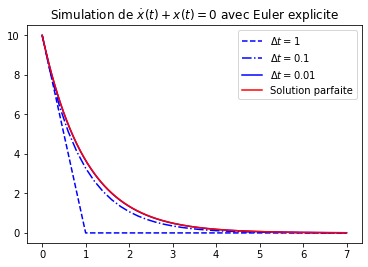

In [16]:
def test(t, x): #test pour l'équation différentielle x'(t) + x(t) = 0
    return(- x)

x0 = [10]
t0 = 0
tf = 7

dt = 1
t, x = solve_euler_explicit(test, x0, dt, t0, tf)
plt.plot(t, x, label = "$\Delta t = 1 $", c='b', linestyle = '--')

dt = 0.2
t, x = solve_euler_explicit(test, x0, dt, t0, tf)
plt.plot(t, x, label = "$\Delta t = 0.1 $", c = 'b', linestyle='-.')

dt = 0.01
t, x = solve_euler_explicit(test, x0, dt, t0, tf)
plt.plot(t, x, label = "$\Delta t = 0.01 $", c = 'b')
x_parfait = x0[0]*(np.exp(t))**(-1)
plt.plot(t, x_parfait, c='r', label = "Solution parfaite")

plt.legend()
plt.title("Simulation de $\dot x(t) + x(t) = 0$ avec Euler explicite")
plt.show()

Il y a bien convergence vers la solution théorique lorsque $\Delta t$ tend vers 0.

Prenons un autre exemple. On définit la fonction orbite comme ceci :

$$
\forall \ \ \ (t \ , \ x = (x1,x2)) \in \mathbb{R_+} \times \mathbb{R^2}, \ \ orbite(t,x) =
\left(\begin{array}{cc} 
x_1 + x_2 - x_1 \cdot (x_1^2 + x_2^2)\\
-x_1 + x_2 - x_2 \cdot (x_1^2 + x_2^2)
\end{array}\right)
$$

Testons l'algorithme sur l'équation $\dot x(t) = orbite(t,x)$

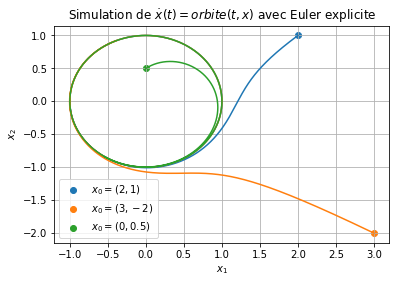

In [17]:
def orbite(t, x):
    return np.array([x[0] + x[1] - x[0]*(x[0]*x[0] + x[1]*x[1]), -x[0] + x[1] - x[1]*(x[0]*x[0] + x[1]*x[1])])

dt = 0.001
t0 = 0
tf = 10

t, x = solve_euler_explicit(orbite, [2, 1], dt, t0, tf)
plt.plot(x[:,0], x[:,1])
plt.scatter(2, 1, label="$x_0 = (2 , 1)$")

t, x = solve_euler_explicit(orbite, [3, -2], dt, t0, tf)
plt.plot(x[:,0], x[:,1])
plt.scatter(3, -2, label="$x_0 = (3 , -2)$")

t, x = solve_euler_explicit(orbite, [0, 0.5], dt, t0, tf)
plt.plot(x[:,0], x[:,1])
plt.scatter(0, 0.5, label="$x_0 = (0 , 0.5)$")

plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Simulation de $\dot x(t) = orbite(t,x) $ avec Euler explicite")
plt.grid()
plt.show()

#### Visualisation graphique de l'ordre de convergence : 

Par définition, si $\exists p \in \mathbb{N^*} \ $et$ c_v > 0$ \ tel que $ \max_{1 \ \leqslant \ j \ \leqslant \ J}{\| x^j - x(t_j) \|} \leqslant c_v (\Delta t)^p$, alors le schéma est convergent d'ordre $p$.

On peut alors tracer $ln(\max_{1 \ \leqslant \ j \ \leqslant \ J}{\| x^j - x(t_j) \|})$ en fonction de $ln(\Delta t)$ et visualiser l'ordre de convergence, représenté par la pente de la droite.

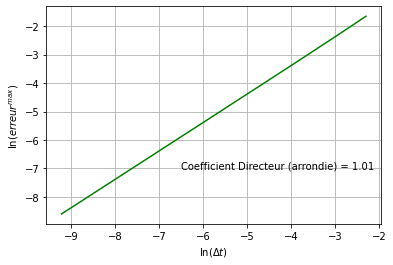

In [8]:
#on détermine l'erreur max et l'indice qui va avec:
def erreur_max(x0, x, t0, tf, dt):
    err_max = 0
    i_err = 0
    for i in range(round((tf-t0)/dt)) :
        err = abs(x[i] - x0[0]*exp(-(t0 + i*dt)))
        if err > err_max:
            err_max = err 
            i_err = i
    return(i_err, err_max) #le couple obtenu dépend du pas de temps 

#on trace l'erreur max en fonction du pas de temps:

x0 = [10]
t0 = 0
tf = 10
dt_min = 10**(-4)
dt_max = 10**(-1)
n = 100
list_dt = np.linspace(dt_min, dt_max, n)
list_err = np.zeros(n)
i = 0


for dt in list_dt: #on calcule l'erreur max pour chaque pas de temps et on créé le vecteur tab_err qui contient les erreurs max
    t, x = solve_euler_explicit(test, x0, dt, t0, tf)
    list_err[i] = erreur_max(x0, x, t0, tf, dt)[1]
    i += 1

plt.text(-6.5, -7, f"Coefficient Directeur (arrondie) = {round(np.polyfit(np.log(list_dt), np.log(list_err), 1)[0], 3)}") #donne le coeff directeur
plt.plot(np.log(list_dt), np.log(list_err), c='green')
plt.xlabel("$\ln(\Delta t)$")
plt.ylabel("$\ln(erreur^{max})$")
plt.grid()
plt.show()

## Question 7 :
Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

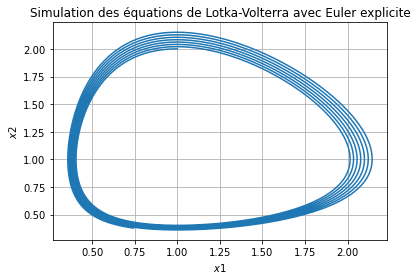

In [32]:
x0 = [1, 2]
t0 = 0
tf = 100
dt = 0.01

t, x = solve_euler_explicit(LV, x0, dt, t0, tf)

plt.plot(x.T[0], x.T[1])
plt.title("Simulation des équations de Lotka-Volterra avec Euler explicite")
plt.grid()
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.show();

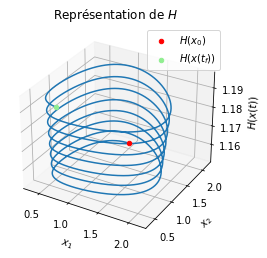

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x.T[0], x.T[1], H(x.T[0], x.T[1]))
ax.scatter(x.T[0,0], x.T[1,0], H(x.T[0], x.T[1])[0], c='r', label="$H(x_0)$")
ax.scatter(x.T[0,-1], x.T[1,-1], H(x.T[0], x.T[1])[-1], c='lightgreen', label="$H(x(t_f))$")

plt.legend()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$H(x(t))$")

plt.title("Représentation de $H$")
plt.show()

On constate que $H$ n'est pas stable, elle évolue au cours du temps de façon croissante.

## Question 8 :
Coder maintenant une fonction du type

$\text{def  solve_euler_implicit }(f, x_0, dt, t_0, t_f, intermax = 100): \\
...\\
\text{return  } t, x$


donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?


### Réponse 8 :


In [11]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):

    t , x_exp = solve_euler_explicit(f, x0, dt, t0, tf)
    x = np.zeros(shape=(round((tf-t0)/dt) + 1, 2))
    x[0] = x0
    eps = 0.01
    for i in range(round((tf-t0)/dt)): 
        
        #calcul de x_new:
        def F(x_new):
            return np.array(x[i] + dt*f(t[i], x_new)) #fonction dont on cherche le point fixe x_new.
        
        x_ref = x_exp[i+1] #valeur reference calculee avec l'algorithme de Euler explicite.
        iteration = 0
        x_new = F(x_ref)
        err = np.linalg.norm((x_new - x_ref)/x_ref)
        
        while iteration < itermax and err > eps: #soit l'erreur est inferieure au seuil, soit on atteint le nb max d'iteration.
            err = np.linalg.norm((F(x_new) - x_new)/x_ref)
            iteration += 1
            x_new = F(x_new) #on itere 
            
        x[i+1] = x_new #On ajoute x_new a la liste des points de la solution.
    return t, x

Testons cet algorithme sur le même exemple que précédemment : $ \dot x(t) + x(t) = 0$.

<ipython-input-11-76f592fdcf84>:16: RuntimeWarning: divide by zero encountered in true_divide
  err = np.linalg.norm((x_new - x_ref)/x_ref)
<ipython-input-11-76f592fdcf84>:19: RuntimeWarning: divide by zero encountered in true_divide
  err = np.linalg.norm((F(x_new) - x_new)/x_ref)


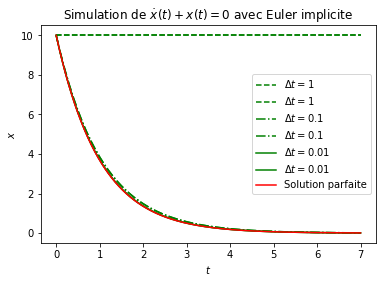

In [18]:
x0 = [10]
t0 = 0
tf = 7
dt = 0.1

dt = 1 #on effectue la résolution avec un pas de temps dt = 1
t, x = solve_euler_implicit(test, x0, dt, t0, tf)
plt.plot(t, x, label = "$\Delta t = 1 $", c='green', linestyle = '--')

dt = 0.1 #on effectue la résolution avec un pas de temps dt = 0.1
t, x = solve_euler_implicit(test, x0, dt, t0, tf)
plt.plot(t, x, label = "$\Delta t = 0.1 $", c='green', linestyle='-.')

dt = 0.01 #on effectue la résolution avec un pas de temps dt = 0.01
t, x = solve_euler_implicit(test, x0, dt, t0, tf)
plt.plot(t, x, label = "$\Delta t = 0.01 $", c = 'green')
x_parfait = x0[0]*(np.exp(t))**(-1) #On trace la solution théorique parfaite (une exponentielle décroissante).
plt.plot(t, x_parfait, c='r', label = "Solution parfaite")

plt.legend()
plt.xlabel("$t$")
plt.ylabel("$x$")

plt.title("Simulation de $\dot x(t) + x(t) = 0$ avec Euler implicite")
plt.show()

On constate que la résolution numérique converge bien vers la solution parfaite lorsque $\Delta t$ tend vers 0.

Reprenons l'exemple de la fonction $orbite$ :

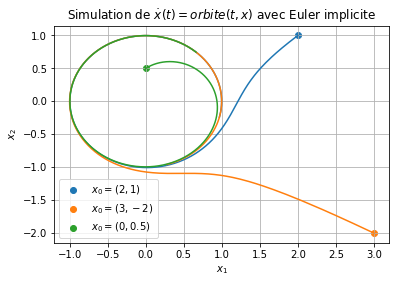

In [31]:
import matplotlib.patches as patches

t, x = solve_euler_implicit(orbite, [2, 1], dt, t0, tf)
plt.plot(x[:,0], x[:,1])
plt.scatter(2, 1, label="$x_0 = (2 , 1)$")

t, x = solve_euler_implicit(orbite, [3, -2], dt, t0, tf)
plt.plot(x[:,0], x[:,1])
plt.scatter(3, -2, label="$x_0 = (3 , -2)$")

t, x = solve_euler_implicit(orbite, [0, 0.5], dt, t0, tf)
plt.plot(x[:,0], x[:,1])
plt.scatter(0, 0.5, label="$x_0 = (0 , 0.5)$")

plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Simulation de $\dot x(t) = orbite(t,x)$ avec Euler implicite")
plt.grid()
plt.show()

Comparons maintenant les applications des deux algorithmes de Euler aux équations de Lotka-volterra : 

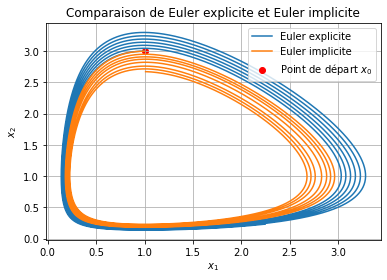

In [14]:
x0 = [1, 3]
t0 = 0
tf = 100
dt = 0.01

t, x_exp = solve_euler_explicit(LV, x0, dt, t0, tf)
t, x_imp = solve_euler_implicit(LV, x0, dt, t0, tf)

plt.scatter(x0[0], x0[1], c='r', label='Point de départ $x_0$') 
plt.plot(x_exp.T[0], x_exp.T[1], label="Euler explicite")
plt.plot(x_imp.T[0], x_imp.T[1], label="Euler implicite")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Comparaison de Euler explicite et Euler implicite")
plt.grid()
plt.legend()
plt.show() #on affiche explicite et implicite

On constate que les algorithmes donnent des solutions qui divergent dans des sens différents : a priori la solution parfaite se trouve au milieu des deux tracés.

Regardons l'évolution de la fonction $H$ : 

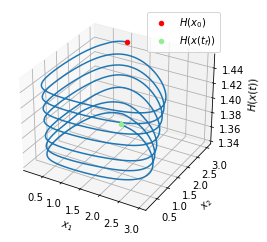

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_imp.T[0], x_imp.T[1], H(x_imp.T[0], x_imp.T[1]))
ax.scatter(x_imp.T[0,0], x_imp.T[1,0], H(x_imp.T[0], x_imp.T[1])[0], c='r', label="$H(x_0)$")
ax.scatter(x_imp.T[0,-1], x_imp.T[1,-1], H(x_imp.T[0], x_imp.T[1])[-1], c='lightgreen', label="$H(x(t_f))$")

plt.legend()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$H(x(t))$")
plt.show()

On constate que $H$ n'est pas stable, mais évolue au cours du temps de façon décroissante.

## Question 9 : 
Expliquer pourquoi les solutions de 

\begin{align*}
\dot{x}_1 &= x_1 (\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)\\
\dot{x}_2 &= -x_2 (\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0) \\
\end{align*}


sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable.

### Réponse 9 :


1. Soit $x$ une solution des équations de Lotka-Volterra. 

    D'après la question 4, $\forall t, H(x(t)) = H(x(0))$ car la fonction H est stable au cours de l'évolution de la solution. Alors, en prenant $H_0 = H(x(0))$, on a bien, pour toute fonction $u$ continûment différentiable, 

    \begin{align*}
    u_1(x_1,x_2)(H(x_1,x_2)-H_0) = 0 \\
    u_2(x_1,x_2)(H(x_1,x_2)-H_0) = 0\\
    \end{align*}

    Soit, 
    \begin{align*}
    \dot{x}_1 &= x_1 (\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)\\
    \dot{x}_2 &= -x_2 (\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0) \\
    \end{align*}

    Donc $x$ est une solution des équations de Lotka-Volterra.


2. Inversement, considérons $x$ solution du système 
    \begin{align*}
    \dot{x}_1 &= x_1 (\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)\\
    \dot{x}_2 &= -x_2 (\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0) \\
    \end{align*}

    Soit $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable. Soit $g$ la fonction telle que le système ci-dessus s'écrive $\dot{x} = g(t, x)$. $g$ est continûment différentiable. En effet, $H$ est continue et $u$ est continûment différentiable par hypothèse.
    
    Le théorème de Cauchy-Lipschitz nous indique alors que $\forall (t_0, x_0) \in \mathbb{R} \times (\mathbb{R}_{>0})^2$, il existe une unique solution maximale du système dans $S_g(t_0, x_0)$.
    Or, la question 4 a permis de montrer que toute solution maximale des équations de Lotka-Voltera initialisée dans $(\mathbb{R}_{>0})^2$ est définie sur $\mathbb{R}$. Une telle solution est aussi solution de $\dot x(t) = g(t,x)$ d'après ce que nous venons de voir, et en est forcément une solution maximale car définie sur $\mathbb{R}$. Par unicité d'une telle solution (Théorème de Cauchy-Lipschitz), on en déduit que $x$ est en fait aussi solution des équations de Lotka-Volterra.

Ainsi, les solutions des deux systèmes sont bien identiques pour tout choix de $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable.


## Question 10 :
Soit $H_0 \in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que

\begin{align*}
\ \frac{d}{dt}(H(x(t))-H_0)&= -k \|\nabla H(x(t)) \|^{2}(H(x(t))-H_0) \\
\end{align*}


En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

### Réponse 10 :

Soit $H_0 \in \mathbb{R}$.

$$
\left .\begin{array}{cll}
\forall t \in \mathbb{R}, \frac{d}{dt}G(t) & =  \delta \dot x_1 - \gamma \frac{\dot x_1}{x_1} + \beta \dot x_2 - \alpha \frac{\dot x_2}{x_2} \\
\\ 
& = - \delta . u_1(x) . G(t) + \gamma . \frac{u_1(x)}{x_1} . G(t) \\
\\
& \ \ \ \ 
- \beta . u_2(x) . G(t) + \alpha . \frac{u_2(x)}{x_2}.G(t) \\
\\
\forall t \in \mathbb{R}, \frac{d}{dt}G(t) & = \bigl [ \ ( \frac{\gamma}{x_1} - \delta).u_1(x) + (\frac{\alpha}{x_2} - \beta).u_2(x) \ \bigr ] . G(t)
\end{array} \right.
$$

Or, $\forall t \in \mathbb{R}$, $\| \nabla H(x(t)) \| ^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2$

Donc, en considérant $u$ continûment différentiable telle que
$
\forall x \in \mathbb{R} u(x) = k \cdot \nabla H(x(t)),
$
on a bien :
$$
\forall t \in \mathbb{R^+}, \frac{d}{dt} (H(x(t)) - H_0) = -k \| \nabla H(x(t)) \| ^2 (H(x(t)) - H_0)
$$

Supposons que $x$ reste à une distance strictement positive de $\bar{x}$, alors il existe $a \in \mathbb{R}$ tel que $\|x(t)-\bar{x}\| \ge a > 0, \forall t \in I$.

Lorsque $\|x-\bar{x}\| \rightarrow +\infty$, au moins une des deux composantes de $x$ tend vers $+\infty$, donc au moins une des deux composantes de $\nabla H(x)$ converge vers un réel strictement positif ($\delta$ ou $\beta$). Ainsi, il existe $A \ge a$ et $b > 0$ tel que $\forall x \in \mathbb{R}_+^2, \|x-\bar{x}\| \ge A \Rightarrow \|\nabla H(x) \|^{2} \ge b$.

Posons $K = \{x \in \mathbb{R}_{+}^2 | a \le \|x-\bar{x}\| \le A \}$, $K$ est fermé borné. 

Par ailleurs, $\|\nabla H \|^2$ est continue sur $K\setminus\partial(\mathbb{R}_{+}^2)$ et tend vers $+\infty$ sur la frontière  $\partial(\mathbb{R}_{+}^2)$. De plus, $\forall x \in K, \|\nabla H(x) \|^2 > 0$ car $\|\nabla H \|^2$ ne s'annule qu'en $\bar{x}$.

Ainsi, $\|\nabla H \|^2$ admet un minimum $c > 0$ sur $K$.

Posons $m = min(b,c)$, alors $\forall t \in I, \|\nabla H(x(t)) \|^2 \ge m > 0$.

Soit $t \in I$,

- Si $H(x(t)) \ge H_0$, alors $\frac{d}{dt}(\lvert H(x(t))-H_0 \rvert) = -k \|\nabla H(x(t)) \|^{2}\lvert H(x(t))-H_0 \rvert$

- Si $H(x(t)) < H_0$, alors $\frac{d}{dt}(\lvert H(x(t))-H_0 \rvert) = -\frac{d}{dt}(H(x(t))-H_0) = k \|\nabla H(x(t)) \|^{2}(H(x(t))-H_0) = -k \|\nabla H(x(t)) \|^{2}\lvert H(x(t))-H_0 \rvert$


Donc, $\forall t \in I, \frac{d}{dt}(\lvert H(x(t))-H_0 \rvert) = -k \|\nabla H(x(t)) \|^{2}\lvert H(x(t))-H_0 \rvert$

$\forall t \in I, \frac{d}{dt}(\lvert H(x(t))-H_0 \rvert) \le -k m\lvert H(x(t))-H_0 \rvert$.

Ce qui donne après intégration entre $0$ et $t$ : $\lvert H(x(t))-H_0 \rvert \le e^{-kmt}$.

Ainsi, $H(x(t))$ converge bien exponentiellement vers $H_0$ lorsque $t$ tend vers $+ \infty$ (en ayant bien sûr $k>0$).

## Question 11 :
En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ?Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(x^{j+1}) - H(x_0)$ en fonction de $H(x^j) - H(x_0)$ au premier ordre en $dt$.

### Réponse 11 :

A l'aide d'un développement limité au premier ordre on a :
$H(x_{j+1}(t)) = H(x_j(t+dt)) = H(x_j(t)) + dt \cdot \frac{d}{dt} H(x_j(t))$

Donc d'après la question 10 :

$H(x_{j+1}(t)) - H(x_0) = H(x_j(t)) - H(x_0) - dt \cdot k \cdot \| \left . \nabla H(x_j(t))\right  \|^2 \cdot (H(x_j(t)) - H_0)$

D'où :

$H(x_{j+1}) - H(x_0) = (H(x_j) - H(x_0)) \cdot (1- dt \cdot k \cdot \| \left . \nabla H(x_j)\right  \|^2)$

Pour assurer la stabilité de $H$, on doit avoir $H(x_{j+1}) - H(x_0) \approx H(x_{j}) - H(x_0)$ et donc $|k| \cdot \| \left . \nabla H(x_j)\right  \|^2 \ll 1$

$k$ doit donc être choisi judicieusement car il faut qu'il soit à la fois petit pour répondre au critère ci-dessus mais il faut aussi qu'il soit suffisamment grand pour assurer une convergence rapide (cf. Question 10).